**General Idea**: There is a time/independent/response variable and a target variable. We try to understand the characteristics of the time variable with time and use this to predict/forecast the target variable at a point in time.
A time series would be of the following types:
1. Trend: The divergence would be continuous in nature. Can be positive/negative/null trend.Its either upward or downsward trend and hence it's easy to predict.
2. Seasonality: Can be a bell curve or saw tooth. The pattern may be repeatable and hence its easy to predict.
3. Cyclical: There is no fixed time interval and there can be uncertainity in the movement and its pattern. Hence, it is difficult to predict.
4. Irregularity: This is similar to Cyclical, but even more erratic and unexpected than it. This is also difficult to predict.

**Time Series Methods**
1. Moving Average Methodology
    - Simple Moving Average(SMA) 
    - Cumulative Moving Average(CMA)
    - Exponentail Moving Average(EMA)
2. Auto-Regressive(AR) model
3. Moving Average(MV) model
4. AutoRegressive Moving Average(ARMA) model
5. ARIMA

# 1. Moving Average Methodology

In this method, the Moving Average(MA) is calculated by taking average of data within a time period - k.

## 1.1 Simple Moving Average(SMA)
It is the mean of the previous M months

SMA<sub>t</sub> = (x<sub>t</sub> + x<sub>t-1</sub> + x<sub>M-(t-1)</sub>)/M

Excercise: to get the SMA of 10 years & 20 years period of air temperature in Barcelona

In [19]:
import pandas as pd

df_temp = pd.read_csv("temperaturesbarcelonadesde1780.csv")
df_temp.head()

,Any,Temp_Mitjana_Gener,Temp_Mitjana_Febrer,Temp_Mitjana_Marc,Temp_Mitjana_Abril,Temp_Mitjana_Maig,Temp_Mitjana_Juny,Temp_Mitjana_Juliol,Temp_Mitjana_Agost,Temp_Mitjana_Setembre,Temp_Mitjana_Octubre,Temp_Mitjana_Novembre,Temp_Mitjana_Desembre
0,1780,6.7,7.3,11.6,11.4,16.3,19.1,21.4,22.0,20.3,16.3,9.2,7.3
1,1781,7.5,8.9,10.9,13.7,16.8,18.0,22.0,22.6,19.1,15.0,11.8,10.3
2,1782,8.2,6.1,9.8,10.5,15.4,20.1,22.3,22.6,19.9,13.8,7.4,7.5
3,1783,8.3,8.6,9.6,12.4,15.0,19.1,22.9,21.4,18.6,15.5,11.0,10.4
4,1784,7.3,7.1,10.8,10.7,16.7,20.7,22.0,20.5,20.0,13.8,8.5,5.3


In [11]:
#Check if the data needs to be cleaned. For that get more information on data.
df_temp.info() #All fields are non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Any                    241 non-null    int64  
 1   Temp_Mitjana_Gener     241 non-null    float64
 2   Temp_Mitjana_Febrer    241 non-null    float64
 3   Temp_Mitjana_Marc      241 non-null    float64
 4   Temp_Mitjana_Abril     241 non-null    float64
 5   Temp_Mitjana_Maig      241 non-null    float64
 6   Temp_Mitjana_Juny      241 non-null    float64
 7   Temp_Mitjana_Juliol    241 non-null    float64
 8   Temp_Mitjana_Agost     241 non-null    float64
 9   Temp_Mitjana_Setembre  241 non-null    float64
 10  Temp_Mitjana_Octubre   241 non-null    float64
 11  Temp_Mitjana_Novembre  241 non-null    float64
 12  Temp_Mitjana_Desembre  241 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 24.6 KB


In [20]:
#Set the Any column as index and rename it to year.
df_temp.set_index('Any', inplace=True)
df_temp.index.name = 'Year'
df_temp.head()

,Temp_Mitjana_Gener,Temp_Mitjana_Febrer,Temp_Mitjana_Marc,Temp_Mitjana_Abril,Temp_Mitjana_Maig,Temp_Mitjana_Juny,Temp_Mitjana_Juliol,Temp_Mitjana_Agost,Temp_Mitjana_Setembre,Temp_Mitjana_Octubre,Temp_Mitjana_Novembre,Temp_Mitjana_Desembre
Year,,,,,,,,,,,,
1780,6.7,7.3,11.6,11.4,16.3,19.1,21.4,22.0,20.3,16.3,9.2,7.3
1781,7.5,8.9,10.9,13.7,16.8,18.0,22.0,22.6,19.1,15.0,11.8,10.3
1782,8.2,6.1,9.8,10.5,15.4,20.1,22.3,22.6,19.9,13.8,7.4,7.5
1783,8.3,8.6,9.6,12.4,15.0,19.1,22.9,21.4,18.6,15.5,11.0,10.4
1784,7.3,7.1,10.8,10.7,16.7,20.7,22.0,20.5,20.0,13.8,8.5,5.3


In [21]:
df_temp['avg_temp'] = df_temp.mean(axis=1)
#Drop all other columns
df_temp = df_temp[['avg_temp']]
df_temp.head()

,avg_temp
Year,
1780,14.075000
1781,14.716667
1782,13.633333
1783,14.400000
1784,13.616667


Text(0, 0.5, 'Temperature [C]')

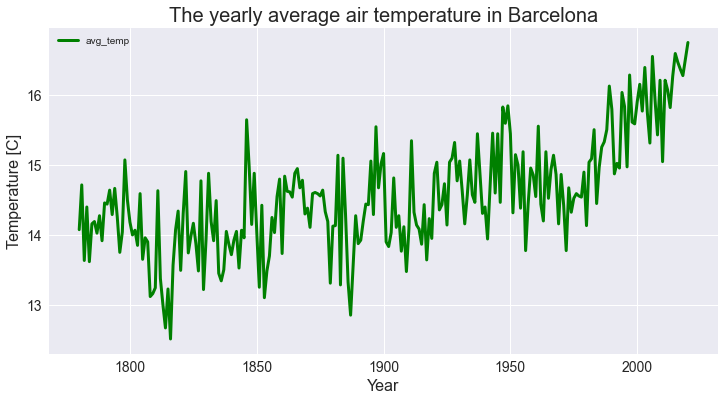

In [22]:
#Visualize the data
import matplotlib.pyplot as plt

#%matplotlib inline
plt.style.use('seaborn')

df_temp.plot(color='green', linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [C]', fontsize=16)

In [23]:
#Calculate the SMA for 10 and 20 years period
df_temp['SMA_10'] = df_temp.avg_temp.rolling(10, min_periods=1).mean()
df_temp['SMA_20'] = df_temp.avg_temp.rolling(20, min_periods=1).mean()
df_temp.head()

,avg_temp,SMA_10,SMA_20
Year,,,
1780,14.075000,14.075000,14.075000
1781,14.716667,14.395833,14.395833
1782,13.633333,14.141667,14.141667
1783,14.400000,14.206250,14.206250
1784,13.616667,14.088333,14.088333


Text(0, 0.5, 'Temperature [°C]')

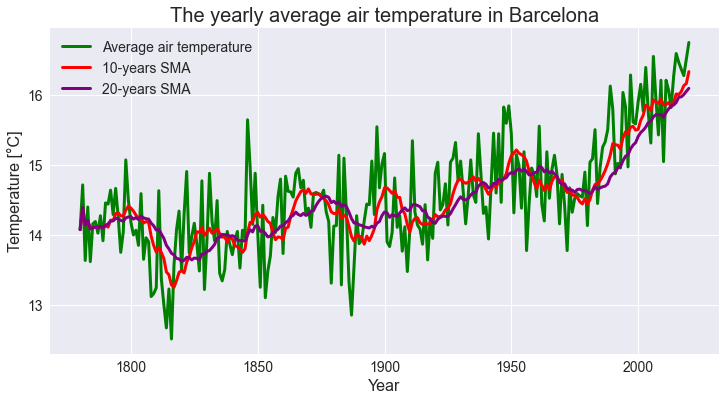

In [24]:
#Plot df_temp
colors = ['green', 'red', 'purple']
df_temp.plot(color=colors, linewidth=3, figsize=(12,6))
# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average air temperature', '10-years SMA', '20-years SMA'], fontsize=14)

# title and labels
plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

Simple Moving Average simply gives the trend of the data. Like in the case of a stock price of an equity, it gives investors the trendline.
In the above trend, the 10 year trend is more aligned or close to the actual temp, while the 20 year trend line is more smoother. And if there was a 30 year trendline, it would more smoother than the 20 year one.

## 1.2 Cumulative Moving Average(CMA)

While in SMA, the time period was a sliding window, CMA approach, it is not a sliding window. It starts from the 1st data point till the current data point.

In [25]:
#To calculate the CMA
df_temp['CMA'] = df_temp.avg_temp.expanding().mean()
df_temp.head()

,avg_temp,SMA_10,SMA_20,CMA
Year,,,,
1780,14.075000,14.075000,14.075000,14.075000
1781,14.716667,14.395833,14.395833,14.395833
1782,13.633333,14.141667,14.141667,14.141667
1783,14.400000,14.206250,14.206250,14.206250
1784,13.616667,14.088333,14.088333,14.088333


Text(0, 0.5, 'Temperature [°C]')

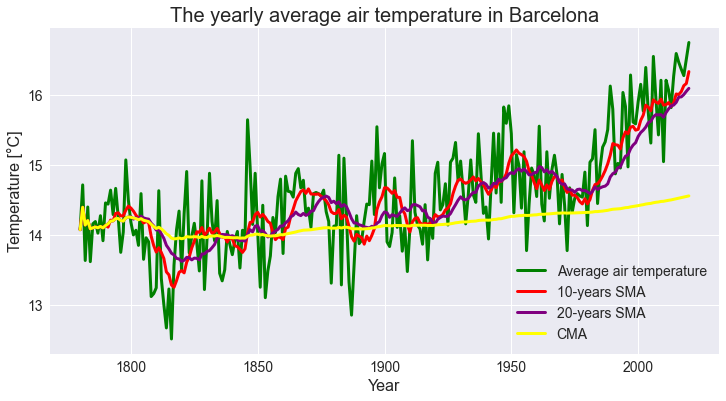

In [26]:
#Plot df_temp
colors = ['green', 'red', 'purple', 'yellow']
df_temp.plot(color=colors, linewidth=3, figsize=(12,6))
# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average air temperature', '10-years SMA', '20-years SMA', 'CMA'], fontsize=14)

# title and labels
plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

Notice how SMA is more closer to the actuals than CMA. This is expected as CMA taken into account of the entire history of the data.

## 1.3 Exponential Moving [Weighted] Average(EMA)

EMA is one of the most used apporach to understand the trendline. EMA for a period t is calculated by using a weight of value<sub>t-1</sub> summed with (1-weight) times v<sub>t</sub>. The wight has to lie in between 0 & 1.
Few observations here in comparison to the previos approaches:
1. Only the current and the previous values are relevant.
2. How do you pick the correct weight - If select the weight as 0.9, that means that you are averaging out 10 past data values, i.e. 1/(1-Weight). As you pick weight closer to 1, the denominator becomes smaller and the time period increases. As the time period increases, the curve becomes smoother. Converse is also true, as you pick the weight closer to 0, the time period becomes smaller and the curve becomes jagged.
3. You can decide if you want to give more importance to the current or the previous value by selecting appropriate weight. For e.g., if you give the weight as 0.98, this means that you are giving 98% weight to the last value and only 2% weight to the current value.

In [35]:
#Calculate the EMA at 0.1 weight/smoothing factor - this means that we are averaging last 1.1 temps which means unsmooth graph.
df_temp['EMA_0.9'] = df_temp.avg_temp.ewm(alpha=0.1, adjust=False).mean()

#Calculate the EMA at 0.9 weight/smoothing factor - this means that we are averaging last 10 temps which means smooth graph.
df_temp['EMA_0.98'] = df_temp.avg_temp.ewm(alpha=0.9, adjust=False).mean()

df_temp.head()

,avg_temp,SMA_10,SMA_20,CMA,EMA_0.1,EMA_0.9,EMA_0.98
Year,,,,,,,
1780,14.075000,14.075000,14.075000,14.075000,14.075000,14.075000,14.075000
1781,14.716667,14.395833,14.395833,14.395833,14.139167,14.139167,14.652500
1782,13.633333,14.141667,14.141667,14.141667,14.088583,14.088583,13.735250
1783,14.400000,14.206250,14.206250,14.206250,14.119725,14.119725,14.333525
1784,13.616667,14.088333,14.088333,14.088333,14.069419,14.069419,13.688353


In [36]:
df_temp_ewa = df_temp[['avg_temp', 'EMA_0.9',  'EMA_0.98']]
df_temp_ewa.head()

,avg_temp,EMA_0.9,EMA_0.98
Year,,,
1780,14.075000,14.075000,14.075000
1781,14.716667,14.139167,14.652500
1782,13.633333,14.088583,13.735250
1783,14.400000,14.119725,14.333525
1784,13.616667,14.069419,13.688353


Text(0, 0.5, 'Temperature [°C]')

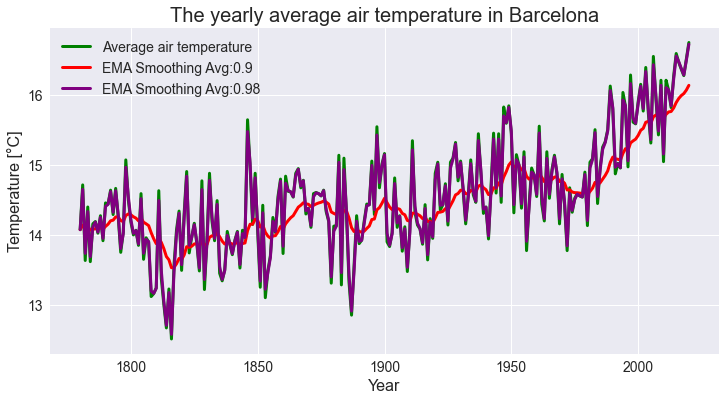

In [37]:
#Plot df_temp
colors = ['green', 'red', 'purple']
df_temp_ewa.plot(color=colors, linewidth=3, figsize=(12,6))
# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average air temperature', 'EMA Smoothing Avg:0.9', 'EMA Smoothing Avg:0.98'], fontsize=14)

# title and labels
plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

0.98 means that it should have picked the average of last 50 temperatures and it should have been smooth. And 0.9 means that it should have picked the average of last 10 temperatures and the line should have been jagged. But the above graph is the opposite!